In [1]:
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import numpy as np

series = pd.Series(np.random.binomial(50, .3, 20))
series.plot(use_index=True)


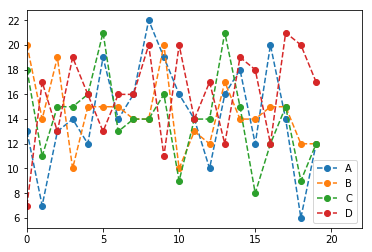

In [2]:
df = pd.DataFrame(np.random.binomial(50, .3, (20,4)), columns="A,B,C,D".split(","))
fig, (ax) = plt.subplots(1,1)

props = {
    "xlim": [0, 22],
    "xticks": [0,5,10, 15,20],
}

ax.set(**props)

df.plot(ax=ax, style="o--")

fig.savefig("data/output/df.png")

In [23]:
arr = np.random.binomial(20, .5, (10,4))
vect = np.vectorize(lambda x, y: y+str(x))
columns = vect(np.arange(4), "bar_")
index = vect(np.arange(10), "data_")

df_hist = pd.DataFrame(arr, columns= pd.Index(columns, name="Entity"), index=index)

df_hist


Entity,bar_0,bar_1,bar_2,bar_3
data_0,13,12,14,10
data_1,14,7,11,10
data_2,6,11,8,8
data_3,13,9,11,10
data_4,9,9,9,11
data_5,6,9,8,9
data_6,4,12,9,13
data_7,9,10,11,9
data_8,9,7,12,13
data_9,12,9,12,10


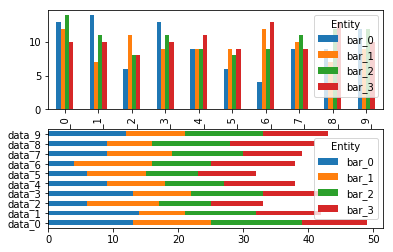

In [24]:
fig, axes = plt.subplots(2)

df_hist.plot.bar(ax=axes[0])
df_hist.plot.barh(ax=axes[1], stacked=True)

### Aggregation

In [53]:
tips = pd.read_csv("data/tips.csv")
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_feq.loc[:, 2:5] ## drop first and last columns

counts_by_day = party_counts.sum(axis=1)

pct_party_counts = party_counts.div(counts_by_day, axis=0)

pct_party_counts



size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


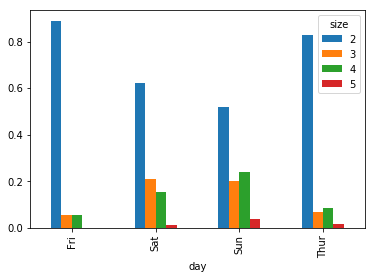

In [54]:
pct_party_counts.plot.bar()

### Aggregation Using Seaborn
- By default it plots mean of values
- It detects wether x or y is number
- The black line represents 95% confidence interval

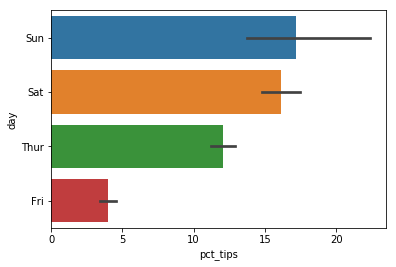

In [63]:
import seaborn as sns
tips["pct_tips"]=tips["tip"]/(tips["total_bill"]-tips["tip"])

sns.barplot(data=tips, x="pct_tips", y="day", estimator=sum)

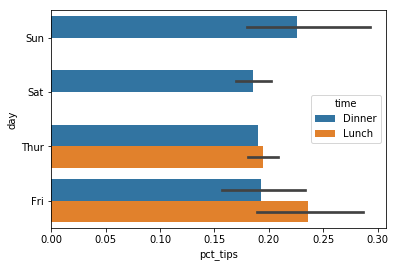

In [64]:
sns.barplot(data=tips, x="pct_tips", y="day", hue="time")

### Histogram

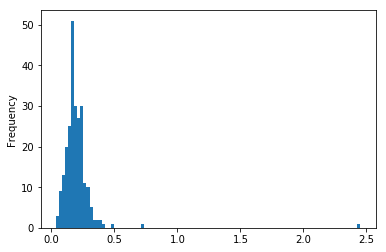

In [110]:
tips["pct_tips"].plot.hist(bins=100)

### Density Plot

/Users/devbhadurkhadka/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


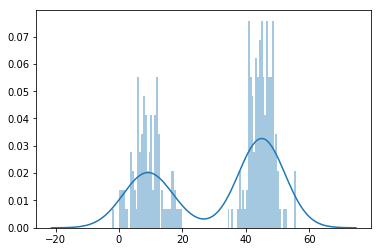

In [130]:
dist1 = np.random.normal(10, 5, 100)
dist2 = np.random.normal(45, 4, 150)
bimod_dist = pd.Series(np.concatenate([dist1, dist2]))
# bimod_dist.plot.hist(bins=100)
# bimod_dist.plot.density()
sns.distplot(bimod_dist, bins=100)